<a href="https://colab.research.google.com/github/amir-asari/AIDroneWorkshop-24-01-2022-/blob/main/BiomehsWorkshop(Part1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prerequisites:

We recommend that you run this this notebook in the cloud on Google Colab (see link with icon at the top) if you're not already doing so. It's the simplest way to get started. You can also [install TensorFlow locally](https://www.tensorflow.org/install/). But, again, simple is best.

[tf.keras](https://www.tensorflow.org/guide/keras) is the simplest way to build and train neural network models in TensorFlow. So, that's what we'll stick with in this tutorial, unless the models neccessitate a lower-level API.

Note that there's [tf.keras](https://www.tensorflow.org/guide/keras) (comes with TensorFlow) and there's [Keras](https://keras.io/) (standalone). You should be using [tf.keras](https://www.tensorflow.org/guide/keras) because (1) it comes with TensorFlow so you don't need to install anything extra and (2) it comes with powerful TensorFlow-specific features.

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys
import random

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import cv2


print(tf.__version__)

2.7.0


## Part 1: Classification of MNIST Dataset with Feed Forward Neural Networks and Convolutional Neural Networks



The MNIST dataset containss 70,000 grayscale images of handwritten digits at a resolution of 28 by 28 pixels. The task is to take one of these images as input and predict the most likely digit contained in the image (along with a relative confidence in this prediction):

<img src="https://i.imgur.com/ITrm9x4.png" width="500px">

Now, we load the dataset. The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
# print(train_images.shape)
# print(type(train_images))

# reshape images to specify that it's a single channel
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)


##print(train_images.shape)

11501568/11490434 [==============================] - 0s 0us/step


We scale (normalize) these values to a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255. It's important that the training set and the testing set are preprocessed in the same way:

In [ ]:
def preprocess_images(imgs): 
    return imgs / 255.0

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

Display the first 5 images from the training set and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

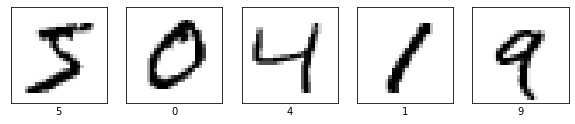

In [ ]:
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

Build the model

Building the neural network requires configuring the layers of the model, then compiling the model. In many cases, this can be reduced to simply stacking together layers:

In this example, we will build 2 models:


1.   model1 - Feed Forward Neural Networks (FNN)/MLP/ANN, the Deep Learning Version
2.   model2 - Convolutional Neural Networks (CNN)



model 1 - FNN

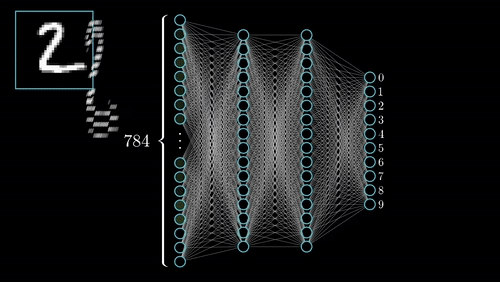

In [ ]:
model1 = keras.Sequential([
  Flatten(input_shape=(28, 28, 1)),
  Dense(128, activation='relu'),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


model 2 - CNN 

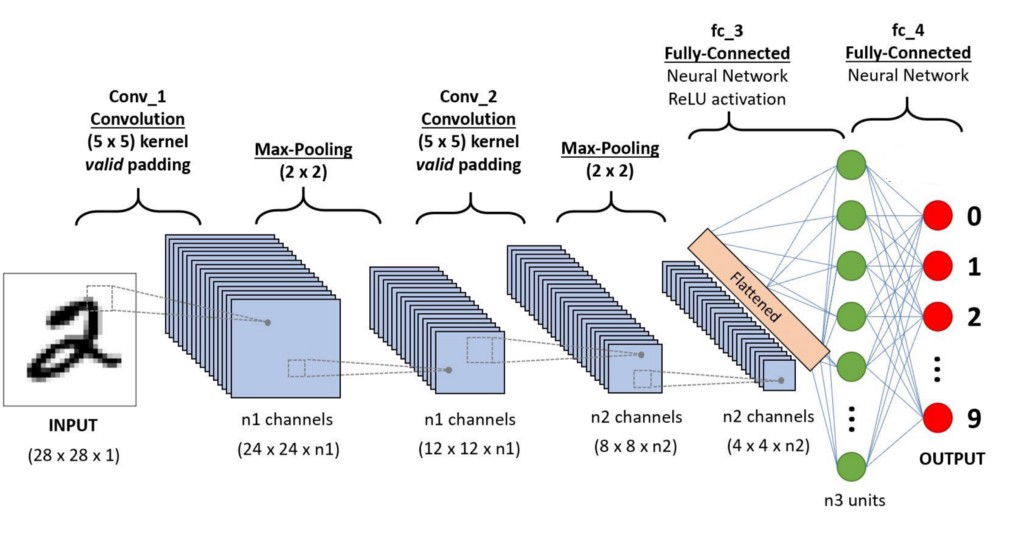

In [ ]:
model2 = keras.Sequential([
  Conv2D(16, kernel_size=(5,5), activation='relu', input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=(2, 2)),
  Conv2D(32, (5, 5), activation='relu'),
  MaxPooling2D(pool_size=(2, 2)),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 128)              

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* - measures how accurate the model is during training, we want to minimize this with the optimizer.
* *Optimizer* - how the model is updated based on the data it sees and its loss function.
* *Metrics* - used to monitor the training and testing steps. "accuracy" is the fraction of images that are correctly classified.


In [ ]:
model1.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  
model2.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) 

### Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model—in this example, the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. We ask the model to make predictions about a test set—in this example, the `test_images` array. We verify that the predictions match the labels from the `test_labels` array. 

To start training,  call the `model.fit` method—the model is "fit" to the training data:

In [ ]:
history = model1.fit(train_images, train_labels, epochs=5, batch_size=1000)

Epoch 1/5
60/60 [==============================] - 2s 3ms/step - loss: 0.7693 - accuracy: 0.7894
Epoch 2/5
60/60 [==============================] - 0s 3ms/step - loss: 0.2548 - accuracy: 0.9273
Epoch 3/5
60/60 [==============================] - 0s 4ms/step - loss: 0.1939 - accuracy: 0.9450
Epoch 4/5
60/60 [==============================] - 0s 3ms/step - loss: 0.1539 - accuracy: 0.9560
Epoch 5/5
60/60 [==============================] - 0s 4ms/step - loss: 0.1295 - accuracy: 0.9630


In [ ]:
history = model2.fit(train_images, train_labels, epochs=5, batch_size=1000)

Epoch 1/5
60/60 [==============================] - 8s 11ms/step - loss: 0.7903 - accuracy: 0.7921
Epoch 2/5
60/60 [==============================] - 1s 10ms/step - loss: 0.1854 - accuracy: 0.9450
Epoch 3/5
60/60 [==============================] - 1s 10ms/step - loss: 0.1098 - accuracy: 0.9678
Epoch 4/5
60/60 [==============================] - 1s 10ms/step - loss: 0.0827 - accuracy: 0.9753
Epoch 5/5
60/60 [==============================] - 1s 10ms/step - loss: 0.0664 - accuracy: 0.9804


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 98.68% on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [ ]:
# print(test_images.shape)
test_loss, test_acc = model1.evaluate(test_images, test_labels)
print('Test accuracy for FNN', test_acc)

test_loss, test_acc = model2.evaluate(test_images, test_labels)
print('Test accuracy for CNN', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1265 - accuracy: 0.9617
Test accuracy for FNN 0.9617000222206116
313/313 [==============================] - 1s 3ms/step - loss: 0.0476 - accuracy: 0.9841
Test accuracy for CNN 0.9840999841690063


##Test The Developed CNN model in Several Test Images 

Select 1 image from test dataset by setting 'index' with 1 number (0-10000)

In [ ]:
index = 99 #3333
sample_image = test_images[index].reshape(1,28,28,1)
predicted_label_prob = model2(sample_image)
# print(predicted_label_prob)

predicted_label = np.argmax(predicted_label_prob)
print('Actual Label:',test_labels[index])
print('Predicted Label:', predicted_label)

Actual Label: 9
Predicted Label: 9


Testing several testing images which are randomly selected from testing dataset

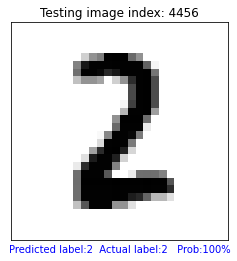

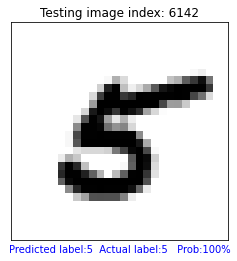

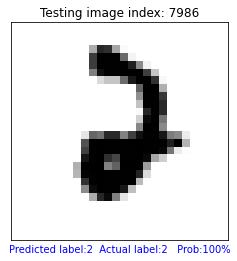

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i].reshape(28,28)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Predicted label:{}  Actual label:{}   Prob:{:2.0f}%".format(predicted_label,
                                true_label,
                                100*np.max(predictions_array)),
                                color=color)
  
  


for i in range(3):
  index = random.randint(0, 9999)
  sample_image = test_images[index].reshape(1,28,28,1)
  predicted_label_prob = model2(sample_image)
  plot_image(index,predicted_label_prob,test_labels,test_images)
  plt.title("Testing image index: {}".format(index))
  plt.pause(1)
 